<a href="https://colab.research.google.com/github/cjvaugha/swiss_tweet_agenda_setting/blob/main/scripts/generate_graphs_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# x = dict.keys(d)
# y = dict.values(d)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12']


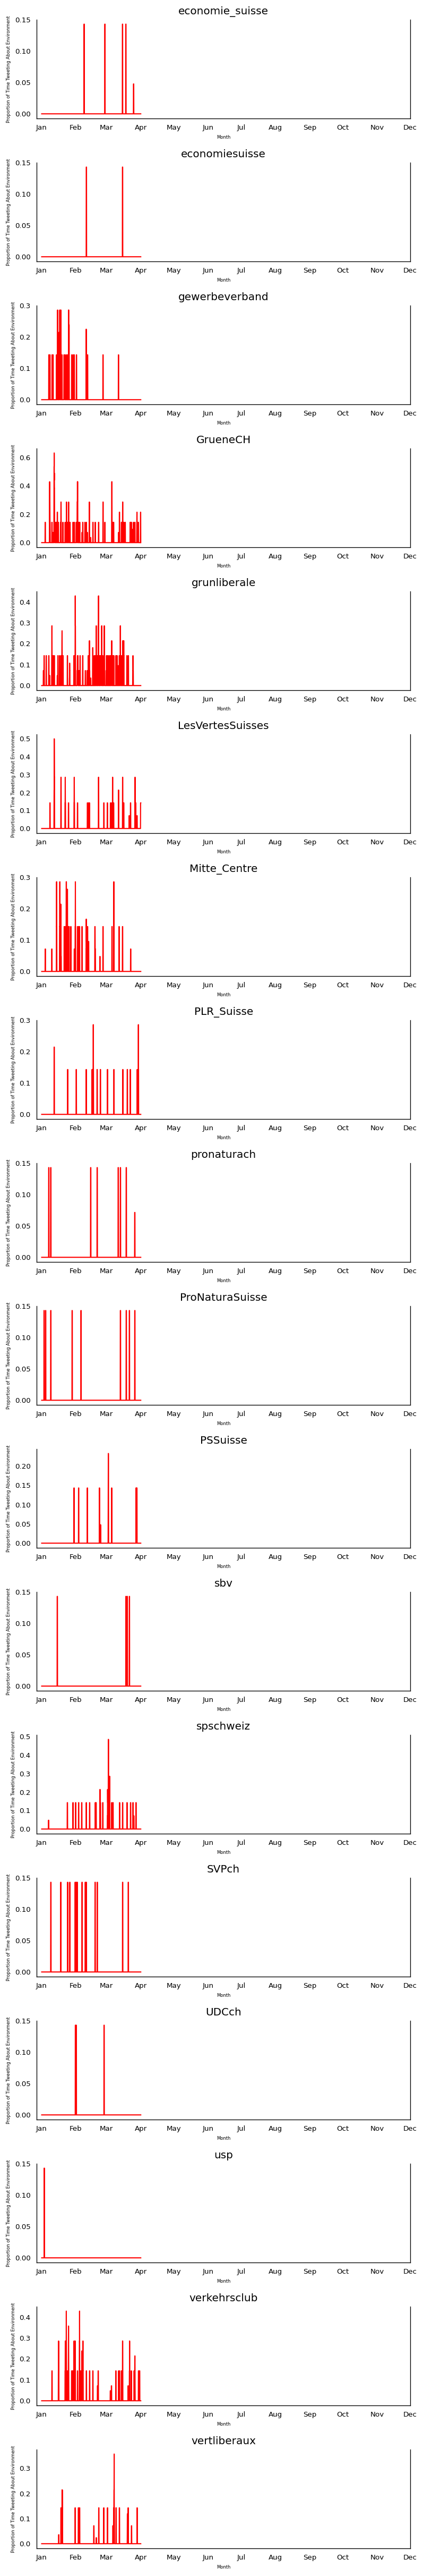

In [ ]:
url = "https://raw.githubusercontent.com/cjvaugha/swiss_tweet_agenda_setting/main/resources/tweet_activity_jan_march.csv"
df = pd.read_csv(url, parse_dates=["datetime"], infer_datetime_format=True, index_col="datetime")


rolling = df.rolling(window=7)
rolling_mean = rolling.mean()

xticks = np.arange(np.datetime64("2019-01"), np.datetime64("2020-01"), np.timedelta64(1,'M'), dtype='datetime64[M]')
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(xticks)

fig, axes = plt.subplots(nrows=18, ncols=1, dpi=120, figsize=(6.75,40.5))
for i, ax in enumerate(axes.flatten()):
     data = rolling_mean[rolling_mean.columns[i]]
      
     ax.plot(data, color='red', linewidth=1.25)
     # Decorations
     ax.set_title(rolling_mean.columns[i])
     ax.xaxis.set_ticks_position('none')
     ax.yaxis.set_ticks_position('none')
     ax.set_xticks(xticks)
     ax.set_xticklabels(xticks_labels)
     ax.set_ylabel('Proportion of Time Tweeting About Environment', fontsize=5)
     ax.set_xlabel('Month', fontsize=5)
     ax.spines["top"].set_alpha(0)
     ax.tick_params(labelsize=8)

plt.tight_layout();


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
maxlag=24
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,economie_suisse_x,economiesuisse_x,gewerbeverband_x,GrueneCH_x,grunliberale_x,LesVertesSuisses_x,Mitte_Centre_x,PLR_Suisse_x,pronaturach_x,ProNaturaSuisse_x,PSSuisse_x,sbv_x,spschweiz_x,SVPch_x,UDCch_x,usp_x,verkehrsclub_x,vertliberaux_x
economie_suisse_y,1.0000,0.9479,0.7935,0.0140,0.1859,0.7756,0.7778,0.8409,0.8975,0.8897,0.8862,0.9264,0.7991,0.8625,0.0000,0.9632,0.5318,0.1946
economiesuisse_y,0.0000,1.0000,0.0000,0.2357,0.6370,0.8506,0.0001,0.0000,0.9322,0.9270,0.9247,0.9513,0.0000,0.0000,0.9579,0.9757,0.4109,0.8857
gewerbeverband_y,0.8152,0.8772,1.0000,0.0070,0.2794,0.0152,0.0006,0.5305,0.0048,0.7426,0.0195,0.0000,0.3160,0.3115,0.0002,0.9130,0.0000,0.8225
GrueneCH_y,0.0446,0.0001,0.0000,1.0000,0.0353,0.0001,0.0008,0.0499,0.6176,0.1903,0.1120,0.0159,0.0858,0.0000,0.0000,0.0933,0.0470,0.5229
grunliberale_y,0.2843,0.0030,0.0915,0.0381,1.0000,0.0104,0.0081,0.1020,0.0881,0.1518,0.0805,0.4280,0.0023,0.0000,0.0065,0.8461,0.0673,0.0026
LesVertesSuisses_y,0.0000,0.0000,0.0000,0.0000,0.0796,1.0000,0.0001,0.0082,0.2607,0.0630,0.0000,0.8101,0.4566,0.0020,0.8352,0.9044,0.0000,0.0046
Mitte_Centre_y,0.0001,0.7262,0.0000,0.0005,0.0943,0.0002,1.0000,0.5402,0.7209,0.7003,0.0318,0.7977,0.0940,0.0017,0.0000,0.6932,0.0000,0.0010
PLR_Suisse_y,0.0002,0.0000,0.4049,0.0000,0.3900,0.0018,0.5469,1.0000,0.7977,0.4928,0.1087,0.0000,0.2249,0.0112,0.0012,0.9268,0.0766,0.0221
pronaturach_y,0.0000,0.9320,0.7324,0.5809,0.5163,0.7096,0.7124,0.0001,1.0000,0.8984,0.8517,0.0000,0.1659,0.8210,0.9168,0.9519,0.6719,0.7536
ProNaturaSuisse_y,0.0000,0.9268,0.5609,0.5518,0.5689,0.6881,0.6911,0.7775,0.0027,1.0000,0.8403,0.0000,0.7201,0.8073,0.9103,0.9482,0.1457,0.7592


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
economie_suisse ::  6049.58   > nan       =>   False
economiesuisse ::  5567.95   > nan       =>   False
gewerbeverband ::  5100.53   > nan       =>   False
GrueneCH ::  4653.28   > nan       =>   False
grunliberale ::  4235.36   > nan       =>   False
LesVertesSuisses ::  3833.07   > nan       =>   False
Mitte_Centre ::  3450.03   > 311.1288  =>   True
PLR_Suisse ::  3076.65   > 263.2603  =>   True
pronaturach ::  2728.67   > 219.4051  =>   True
ProNaturaSuisse ::  2398.53   > 179.5199  =>   True
PSSuisse ::  2084.37   > 143.6691  =>   True
sbv    ::  1776.59   > 111.7797  =>   True
spschweiz ::  1470.44   > 83.9383   =>   True
SVPch  ::  1188.14   > 60.0627   =>   True
UDCch  ::  914.49    > 40.1749   =>   True
usp    ::  650.22    > 24.2761   =>   True
verkehrsclub ::  395.89    > 12.3212   =>   True
vertliberaux ::  155.52    > 4.1296    =>   True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/vector_ar/vecm.py:608: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


In [ ]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(2156, 18)
(4, 18)


In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "economie_suisse" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -46.4991
 No. Lags Chosen       = 0
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "economiesuisse" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -46.4436
 No. Lags Chosen       = 0
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gewerbeverband" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationar

In [ ]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Lag Order = 1
AIC :  -93.78742073921256
BIC :  -92.88670763811375
FPE :  1.8562833658039278e-41
HQIC:  -93.45794557863915 

Lag Order = 2
AIC :  -93.86042320838062
BIC :  -92.10573216045162
FPE :  1.7256890768375663e-41
HQIC:  -93.21855321150167 

Lag Order = 3
AIC :  -93.77191185897172
BIC :  -91.16258936831184
FPE :  1.8856584712837408e-41
HQIC:  -92.81739326147351 

Lag Order = 4
AIC :  -93.784482105242
BIC :  -90.31987386241482
FPE :  1.8626038680510414e-41
HQIC:  -92.51706081776163 

Lag Order = 5
AIC :  -93.6130829285778
BIC :  -89.29253380921911
FPE :  2.2118195114583348e-41
HQIC:  -92.03250453613684 

Lag Order = 6
AIC :  -93.47200599111967
BIC :  -88.29486005454255
FPE :  2.5486120284449124e-41
HQIC:  -91.57801575255674 

Lag Order = 7
AIC :  -93.34739175726986
BIC :  -87.31299224506662
FPE :  2.889487105239214e-41
HQIC:  -91.13973460467177 

Lag Order = 8
AIC :  -93.10896140241438
BIC :  -86.21665073705542
FPE :  3.6719720535257555e-41
HQIC:  -90.58738194054617 

Lag Order = 

Order 1 is most appropriate as it minimizes BIC

In [ ]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 30, Mar, 2022
Time:                     22:16:11
--------------------------------------------------------------------
No. of Equations:         18.0000    BIC:                   -92.8867
Nobs:                     2155.00    HQIC:                  -93.4579
Log likelihood:           46357.3    FPE:                1.85628e-41
AIC:                     -93.7874    Det(Omega_mle):     1.58498e-41
--------------------------------------------------------------------
Results for equation economie_suisse
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.002332         0.001016            2.294           0.022
L1.economie_suisse         -0.002060         0.021670           -0.095           0.924
L1.economiesuisse         

In [ ]:
!pip install zepid

['economie_suisse', 'economiesuisse', 'gewerbeverband', 'GrueneCH', 'grunliberale', 'LesVertesSuisses', 'Mitte_Centre', 'PLR_Suisse', 'pronaturach', 'ProNaturaSuisse', 'PSSuisse', 'sbv', 'spschweiz', 'SVPch', 'UDCch', 'usp', 'verkehrsclub', 'vertliberaux']


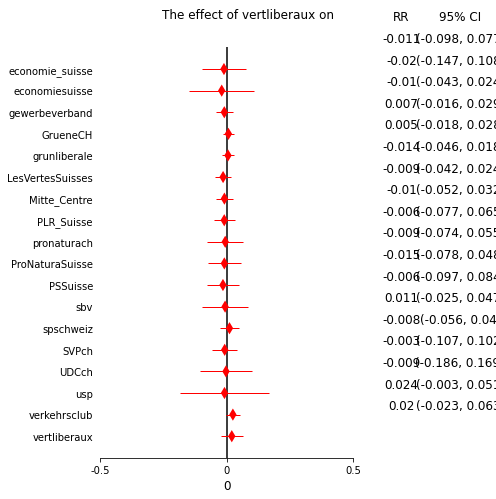

In [ ]:
###forest plots of confidence intervals

#Mitte centre
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot
import pandas as pd

url = "https://raw.githubusercontent.com/cjvaugha/swiss_tweet_agenda_setting/main/resources/coeff_conf_int.csv"
df = pd.read_csv(url)

acct_to_predict = "vertliberaux"

df = df.loc[df['predicton'] == acct_to_predict]
labs = df["predictor"].values.tolist()[1:]
measure = df["coefficient"].values.tolist()[1:]
upper = df["upper_bound"].values.tolist()[1:]
lower = df["lower_bound"].values.tolist()[1:]

print(labs)




p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
p.labels(effectmeasure='RR', center=0)
p.colors(pointshape="d", linecolor="black", pointcolor="red", errorbarcolor="red")
ax=p.plot(figsize=(7,7), t_adjuster=0.10, max_value=0.5, min_value=-0.5)
plt.suptitle("The effect of "+ acct_to_predict +" on")
ax.set_xlabel("0", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.tight_layout()
#plt.savefig("Missing Data Imputation Method",bbox_inches='tight')


economie_suisse : 
lower = [-0.16910368, -0.22609716, -0.08683756, -0.26738992, -0.21008516, -0.1762944, -0.25293836, -0.12637668, -0.17225092, -0.08945264, -0.30678308]
upper = [0.13923568, 0.11188916, 0.18927156, -0.00405608000000002, 0.06870916, 0.1725464, 0.00378635999999997, 0.13257068, -0.00133107999999998, 0.08492464, 0.12519308]
measure = [-0.014934, -0.057104, 0.051217, -0.135723, -0.070688, -0.001874, -0.124576, 0.003097, -0.086791, -0.002264, -0.090795]

economiesuisse :
measure = [-0.09064, 0.030239, 0.032557, 0.086664, 0.061474, -0.027063, 0.213244, 0.040762, 0.001169, 0.101077, -0.148724]
lower = [-0.28133624, -0.17879304, -0.13820604, -0.07619632, -0.11095112, -0.24280608, 0.05447028, -0.11938764, -0.10453968, -0.00676808, -0.41588376]
upper = [0.10005624, 0.23927104, 0.20332004, 0.24952432, 0.23389912, 0.18868008, 0.37201772, 0.20091164, 0.10687768, 0.20892208, 0.11843576]

gewerbeverband:
measure = [-0.048069, 0.076715, 0.041194, 0.006986, 0.104389, -0.076801, 0.007238, 0.019032, -0.01097, -0.061444, -0.003066]
lower = [-0.16747808, -0.0541738, -0.06573184, -0.0949928, -0.0035776, -0.21189204, -0.09218104, -0.08124748, -0.07716116, -0.12897188, -0.170352]
upper = [0.07134008, 0.2076038, 0.14811984, 0.1089648, 0.2123556, 0.05829004, 0.10665704, 0.11931148, 0.05522116, 0.00608388, 0.16422]

GrueneCH:
measure = [0.005362, 0.0048, -0.004879, 0.058303, -0.011005, 0.004315, 0.023056, 0.005198, 0.04623, -0.00141, 0.060494]
lower = [-0.07822612, -0.08682412, -0.07972944, -0.01308216, -0.0865826, -0.09025108, -0.04653772, -0.0649994, -0.000104400000000004, -0.04868128, -0.05660816]
upper = [0.08895012, 0.09642412, 0.06997144, 0.12968816, 0.0645726, 0.09888108, 0.09264972, 0.0753954, 0.0925644, 0.04586128, 0.17759616]

grunliberale:
measure = [-0.042723, 0.030463, -0.04866, 0.139554, 0.048113, -0.004468, 0.040301, 0.064154, 0.034809, 0.02659, -0.006309]
lower = [-0.13982728, -0.07597676, -0.13561344, 0.05662444, -0.03968716, -0.114326, -0.04054704, -0.01739572, -0.01901848, -0.02832528, -0.14234868]
upper = [0.05438128, 0.13690276, 0.03829344, 0.22248356, 0.13591316, 0.10539, 0.12114904, 0.14570372, 0.08863648, 0.08150528, 0.12973068]

LesVertesSuisses:
measure = [0.019463, 0.026642, -0.009389, -0.044639, -0.019211, -0.037824, 0.005611, -0.008208, -0.013294, -0.036859, -0.019146]
lower = [-0.06727092, -0.06843172, -0.08705792, -0.11871328, -0.09763452, -0.1359514, -0.06660324, -0.08104944, -0.0613728, -0.08590996, -0.14065816]
upper = [0.10619692, 0.12171572, 0.06827992, 0.02943528, 0.05921252, 0.0603034, 0.07782524, 0.06463344, 0.0347848, 0.01219196, 0.10236616]

mitte_centre:
measure = [-0.779891, -0.05454, -0.016462, 0.00636, -0.087506, 0.058573, -0.117483, 0.151302, -0.061727, 0.062781, -0.002792]
lower = [-0.90032908, -0.18655776, -0.124311, -0.09649688, -0.1964036, -0.07768424, -0.21775856, 0.0501562, -0.12848852, -0.00533096, -0.17152056]
upper = [-0.65945292, 0.07747776, 0.091387, 0.10921688, 0.0213916, 0.19483024, -0.01720744, 0.2524478, 0.00503452000000001, 0.13089296, 0.16593656]

PLR_Suisse:
measure=[0.071512, -0.046984, -0.721797, -0.049959, 0.032049, -0.220801, 0.100828, 0.02036, 0.028406, -0.055913, -0.063086]
lower=[-0.0609742, -0.19220824, -0.84043384, -0.16310588, -0.08774228, -0.37068808, -0.00947884, -0.09090332, -0.04503324,-0.13083792, -0.24869212]
upper=[0.2039982, 0.09824024, -0.60316016, 0.06318788, 0.15184028, -0.07091392, 0.21113484, 0.13162332, 0.10184524, 0.01901192, 0.12252012]

pronaturach:
measure=[0.053946, -0.847242, 0.113405, 0.028579, -0.104039, -0.088068, 0.021858, 0.10665, 0.014446, 0.177726, 0.035684]
lower=[-0.06645876, -0.97922252, 0.00558736, -0.07424848, -0.21290524, -0.22428604, -0.07839012, 0.0055336, -0.05229592, 0.10963364, -0.13299752]
upper=[0.17435076, -0.71526148, 0.22122264, 0.13140648, 0.00482724, 0.04815004, 0.12210612, 0.2077664, 0.08118792, 0.24581836, 0.20436552]

pronaturasuisse:
measure=[0.084313, -0.079918, 0.038991, 0.044309, 0.035815, -0.87853, 0.011317, 0.025839, -0.007897, -0.081555, -0.126019]
lower=[-0.02832232, -0.20338232, -0.0618706, -0.05188388, -0.0660266, -1.00595744, -0.08246312, -0.06875256, -0.0703328, -0.14525304, -0.28381664]
upper=[0.19694832, 0.04354632, 0.1398526, 0.14050188, 0.1376566, -0.75110256, 0.10509712, 0.12043056, 0.0545388, -0.01785696, 0.03177864]

pssuisse:
measure=[0.038961, -0.090776, 0.117388, 0.170805, -0.043306, 0.030354, -0.66035, -0.054319, 0.032854, -0.053364, 0.025627]
lower=[-0.09724528, -0.240079, -0.00458083999999999, 0.05448096, -0.1664626, -0.12374316, -0.7737556, -0.16870656, -0.04264912, -0.13039396, -0.16519468]
upper=[0.17516728, 0.058527, 0.23935684, 0.28712904, 0.0798506, 0.18445116, -0.5469444, 0.06006856, 0.10835712, 0.02366596, 0.21644868]

sbv:
measure=[-0.079234, -0.168631, -0.07605, 0.010161, 0.040186, -0.051856, 0.033787, -0.79586, 0.057544, 0.043562, -0.02457]
lower=[-0.02037048, -0.32714012, -0.20553936, -0.11333664, -0.09056364, -0.21545524, -0.08661188, -0.9173016, -0.02261412, -0.03821704, -0.22715756]
upper=[0.26221448, -0.01012188, 0.05343936, 0.13365864, 0.17093564, 0.11174324, 0.15418588, -0.6744184, 0.13770212, 0.12534104, 0.17801756]

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

economie_suisse : 2.11
economiesuisse : 2.09
gewerbeverband : 1.99
GrueneCH : 2.04
grunliberale : 2.02
LesVertesSuisses : 2.03
Mitte_Centre : 2.03
PLR_Suisse : 2.06
pronaturach : 2.08
ProNaturaSuisse : 2.04
PSSuisse : 2.08
sbv    : 2.04
spschweiz : 2.0
SVPch  : 2.1
UDCch  : 2.12
usp    : 1.98
verkehrsclub : 2.14
vertliberaux : 2.03


Little obserbved correlation of residuals. Good to go